In [1]:
import pandas as pd

# 读取数据
载入数据，parse_dates参数将datetime列标记为时间

In [2]:
train = pd.read_csv('../data/train.csv', parse_dates=['datetime'])
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


将时间特征拆分以利于分析

In [4]:
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021,9,1,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021,9,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021,9,1,0
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021,9,1,0
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023,5,31,23
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023,5,31,23
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023,5,31,23
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023,5,31,23


读取天然气价格数据

In [5]:
gas_prices = pd.read_csv('../data/gas_prices.csv', parse_dates=['forecast_date'])
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


# 生产电量与天然气价格相关性
先筛选train中的生产数据，即is_consumption=0, 再按照data_block_id分组，计算每天的target均值。随后与天然气价格拼接，计算天然气价格与每日生产电量的相关性

In [6]:
train_isconsumption = train[train['is_consumption'] == 0]
train_isconsumption = train_isconsumption.groupby('data_block_id').mean()
train_isconsumption

,county,is_business,product_type,target,is_consumption,datetime,row_id,prediction_unit_id,year,month,day,hour
data_block_id,,,,,,,,,,,,
0,7.393443,0.508197,2.000000,107.585650,0.0,2021-09-01 11:30:00.000000000,1463.0,30.000000,2021.0,9.0,1.0,11.5
1,7.393443,0.508197,2.000000,94.810257,0.0,2021-09-02 11:30:00.000000000,4391.0,30.000000,2021.0,9.0,2.0,11.5
2,7.393443,0.508197,2.000000,87.363928,0.0,2021-09-03 11:30:00.000000000,7319.0,30.000000,2021.0,9.0,3.0,11.5
3,7.393443,0.508197,2.000000,134.611719,0.0,2021-09-04 11:30:00.000000000,10247.0,30.000000,2021.0,9.0,4.0,11.5
4,7.393443,0.508197,2.000000,114.101035,0.0,2021-09-05 11:30:00.000000000,13175.0,30.000000,2021.0,9.0,5.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...
633,7.333333,0.545455,1.878788,486.865264,0.0,2023-05-27 11:30:00.000000000,2004287.0,33.818182,2023.0,5.0,27.0,11.5
634,7.276923,0.553846,1.876923,490.047463,0.0,2023-05-28 11:30:00.000000256,2007431.0,33.661538,2023.0,5.0,28.0,11.5
635,7.276923,0.553846,1.876923,398.097836,0.0,2023-05-29 11:30:00.000000256,2010551.0,33.661538,2023.0,5.0,29.0,11.5


In [7]:
# 生产电量与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_isconsumption, right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,0.047948,0.037140
lowest_price_per_mwh,0.047948,1.000000,0.981314
highest_price_per_mwh,0.037140,0.981314,1.000000


# 消费电量与天然气价格的相关性
筛选train中的消费数据，并按照天进行分组计算均值，再计算与天然气价格的相关性

In [8]:
train_consumption = train[train['is_consumption'] == 1]
train_consumption = train_consumption.groupby(by='data_block_id').mean()
train_consumption.head()

,county,is_business,product_type,target,is_consumption,datetime,row_id,prediction_unit_id,year,month,day,hour
data_block_id,,,,,,,,,,,,
0,7.393443,0.508197,2.0,351.045052,1.0,2021-09-01 11:30:00,1464.0,30.0,2021.0,9.0,1.0,11.5
1,7.393443,0.508197,2.0,354.445564,1.0,2021-09-02 11:30:00,4392.0,30.0,2021.0,9.0,2.0,11.5
2,7.393443,0.508197,2.0,360.600936,1.0,2021-09-03 11:30:00,7320.0,30.0,2021.0,9.0,3.0,11.5
3,7.393443,0.508197,2.0,254.962020,1.0,2021-09-04 11:30:00,10248.0,30.0,2021.0,9.0,4.0,11.5
4,7.393443,0.508197,2.0,250.662279,1.0,2021-09-05 11:30:00,13176.0,30.0,2021.0,9.0,5.0,11.5


In [9]:
# 消费电量与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_consumption, right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,-0.245156,-0.215926
lowest_price_per_mwh,-0.245156,1.000000,0.981314
highest_price_per_mwh,-0.215926,0.981314,1.000000


# 电量与时间的相关性

## 消费电量与时间的相关性
判断一个地区的一天中，消费电量和小时的相关性，以地区0，1，2，3, 4, 5为例, 指定data_block_id = 1

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='hour', ylabel='target'>

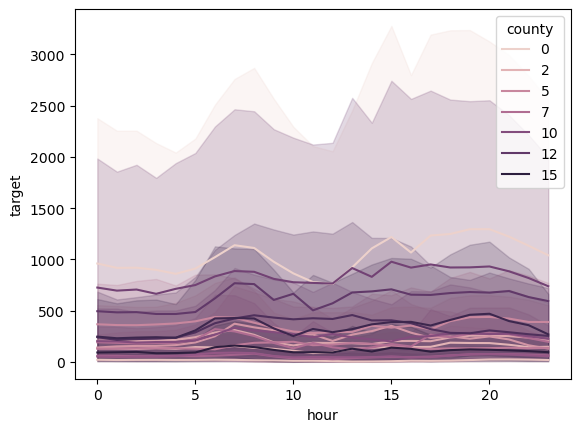

In [28]:
train_corr_hour = train[(train['data_block_id'] == 1) & (train['is_consumption'] == 1)]
sns.lineplot(data=train_corr_hour, x='hour', y='target', hue='county')

指定**is_business=0**

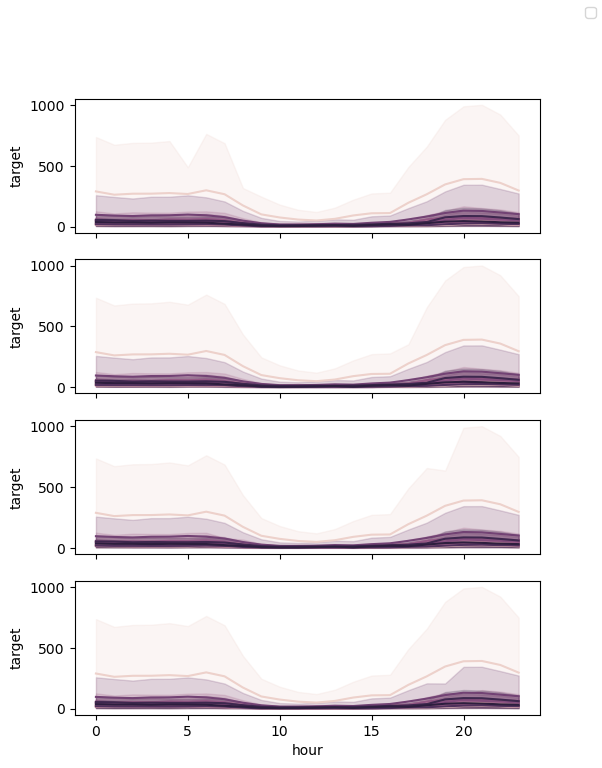

In [66]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour[train_corr_hour['is_business'] == 0]
for i, ax in enumerate(axes.ravel()):
    axsub = sns.lineplot(data=data, x='hour', y='target', hue='county' ,ax=ax, legend=False)
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, labels)

指定三个地区0，1，2，3, 指定**is_business=1**, 指定product_type=1

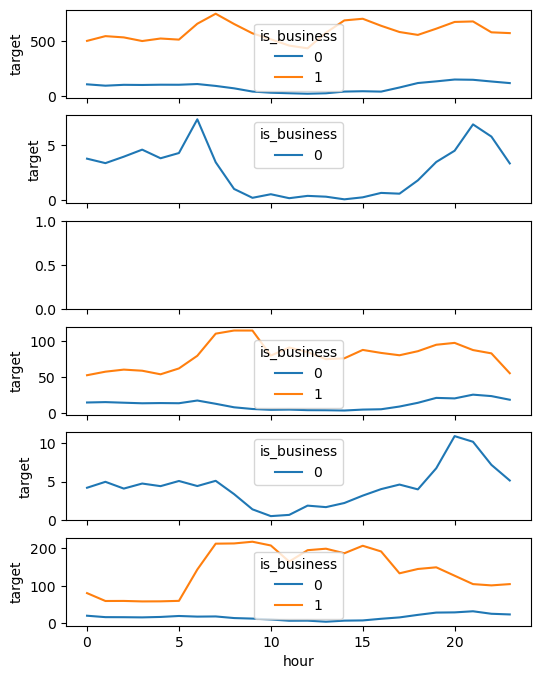

In [57]:
figure, axes = plt.subplots(6, 1, sharex=True, figsize=(6, 8))
for i, ax in enumerate(axes.ravel()):
    data = train_corr_hour[(train_corr_hour['product_type'] == 1) & (train_corr_hour['county'] == i)]
    axsub = sns.lineplot(data=data, x='hour', y='target', hue='is_business', ax=ax)

county:7包含了4种产品，总类最全，所以看county:7的消费电量与business和product_type的相关性